Given a results folder, plot the rewards across context values

In [1]:

# dataframe with columns: context_mode, seed, context_value, reward
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_rewards(run_dir: str):
    """
    given a run directory, plots the rewards for each context value for each context mode
    """
    default_context_value = 10
    # run_dir = parent of current dir + run_dir
    run_dir = os.path.join(os.path.dirname(os.getcwd()), run_dir)
    reward_df = pd.DataFrame(columns=["context_mode", "seed", "context_value", "reward"])

    for root, dirs, files in os.walk(run_dir):
        for file in files:
            if file.startswith("sac_rewards_") and file.endswith(".json"):
                # files are named "sac_rewards_{env_id}_{context_mode}_{seed}.json"
                with open(os.path.join(root, file), "r") as f:
                    data = json.load(f)
                    # data is a dict with {"context_value":rewards}
                    context_mode = file.split("_")[3] + ('_' + file.split("_")[4] if file.split("_")[3] == 'learned' else '') # 'contextual' or 'noncontextual
                    seed = int(file.split("_")[-1].split(".")[0])
                    for context_value, rewards in data.items():
                        for reward in rewards:
                            reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)
                        
    plt.figure(figsize=(20, 6))
    sns.violinplot(data=reward_df, x="context_value", y="reward", hue="context_mode")

    # x labels every 1
    # round the x labels

    context_values = reward_df["context_value"].unique()
    context_values = [float(x) for x in context_values]

    #plt.xticks(ticks=range(1,11), labels=[round(x, 2) for x in context_values])
    # color plot between x=0.2*default_context_value and x=2.0*default_context_value
    #x = np.linspace(0, 10, 100)
    #plt.fill_between(x, y1=1, y2=2, color='gray', alpha=0.3)
    #plt.axvspan(0.2*default_context_value, default_context_value, color="gray", alpha=0.2)
    #plt.axvspan(0.2*default_context_value, 2*default_context_value, facecolor='g', alpha=0.1)
    plt.show()

    

/tmp/ipykernel_2493645/1576777972.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/tmp/ipykernel_362703/884721006.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


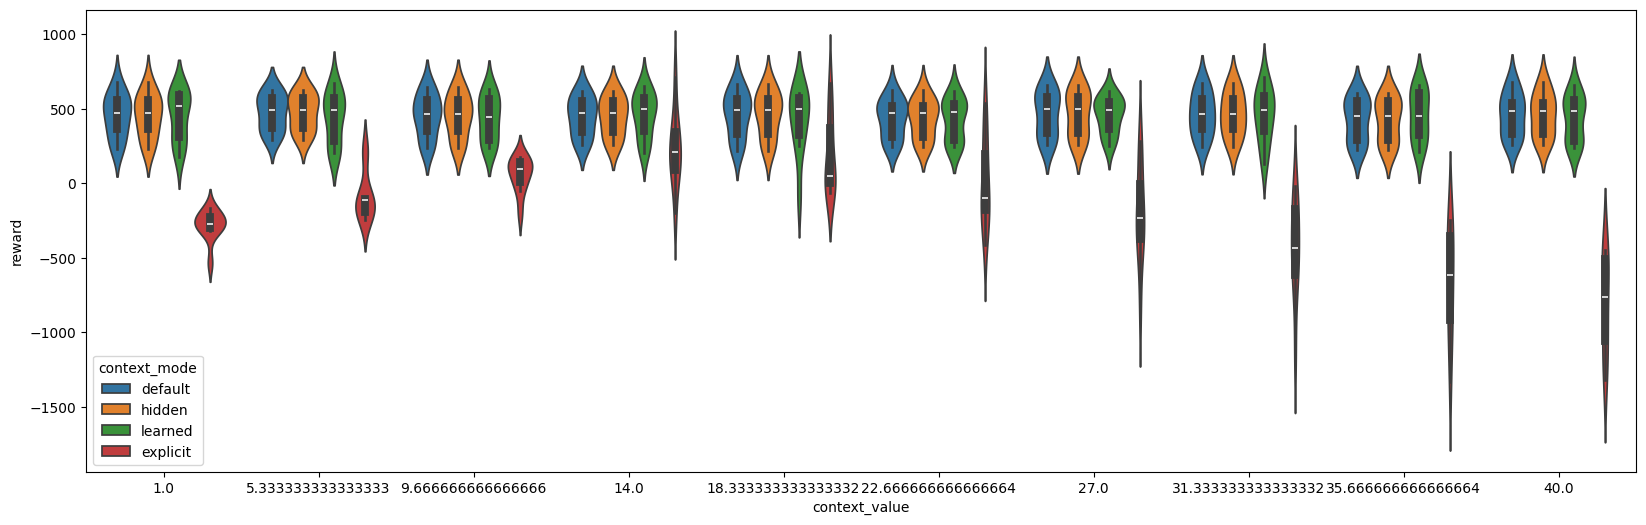

In [2]:
# Env: CARLBraxAnt, context: mass_torso, total_timesteps: 30000
# train_env : lower_bound_coeff: 0.2, upper_bound_coeff: 2.0, distribution: uniform (100 samples)
# test_env : lower_bound_coeff: 0.1, upper_bound_coeff: 4.0, distribution: discrete (10 samples) 
plot_rewards("results/hydra/multirun/2024-02-03/12-49-45")

/tmp/ipykernel_1432602/884721006.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


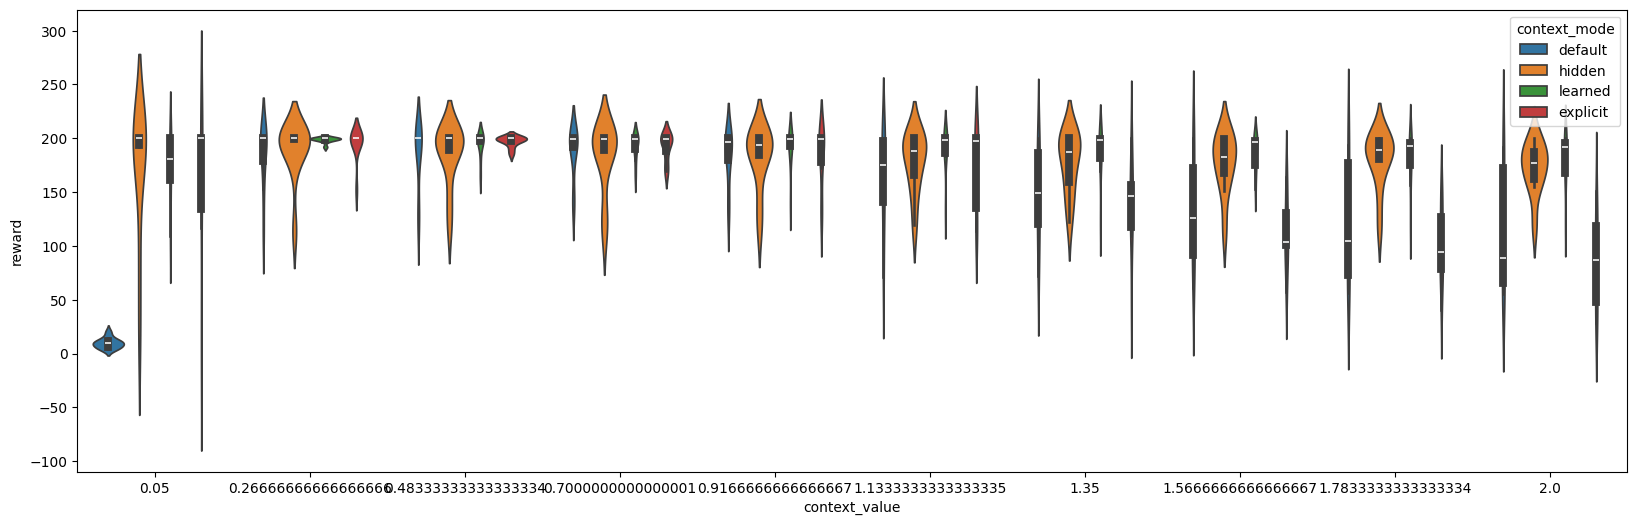

In [3]:
# Env: CARLCartpoleContinuous, context: length, total_timesteps: 30000
# train_env : lower_bound_coeff: 0.2, upper_bound_coeff: 2.0, distribution: uniform (100 samples)
# test_env : lower_bound_coeff: 0.1, upper_bound_coeff: 4.0, distribution: discrete (10 samples) 
plot_rewards("results/hydra/multirun/2024-02-03/21-16-29")


/tmp/ipykernel_2984725/2122905763.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


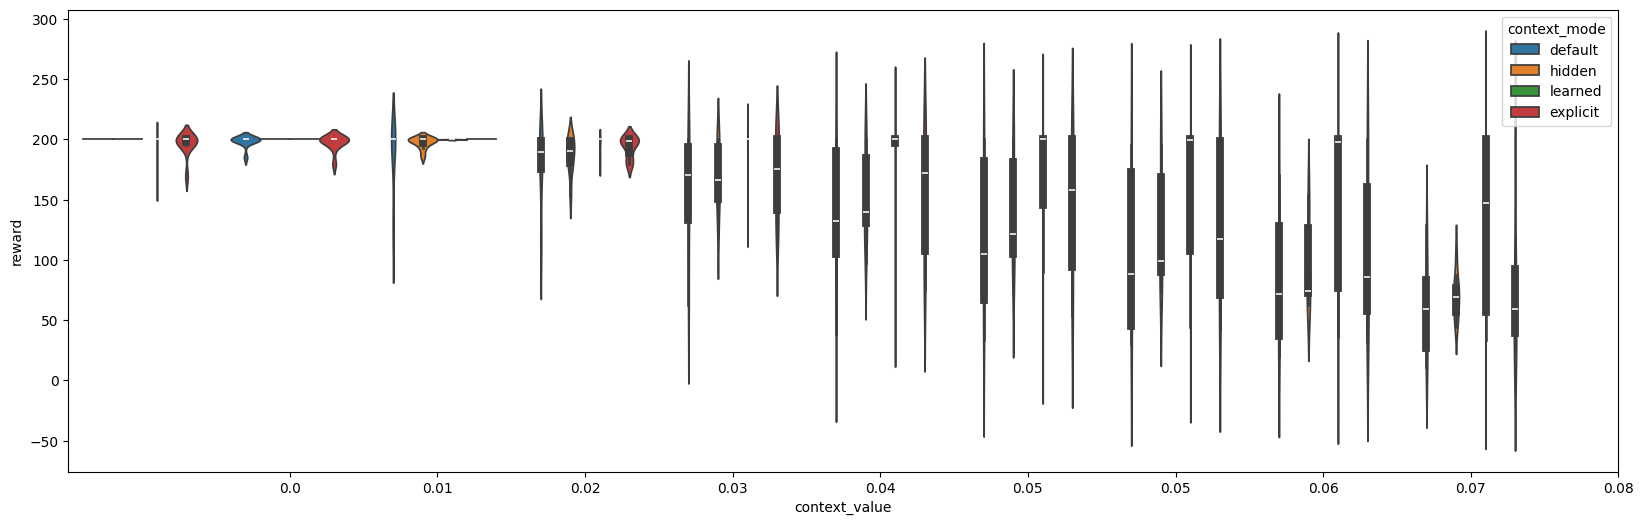

In [10]:
# Env: CARLCartpoleContinuous, context: tau, total_timesteps: 30000
# train_env : lower_bound_coeff: 0.2, upper_bound_coeff: 2.0, distribution: uniform (100 samples)
# test_env : lower_bound_coeff: 0.1, upper_bound_coeff: 4.0, distribution: discrete (10 samples) 
plot_rewards("results/hydra/multirun/2024-02-04/12-24-04")


/tmp/ipykernel_2944974/884721006.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


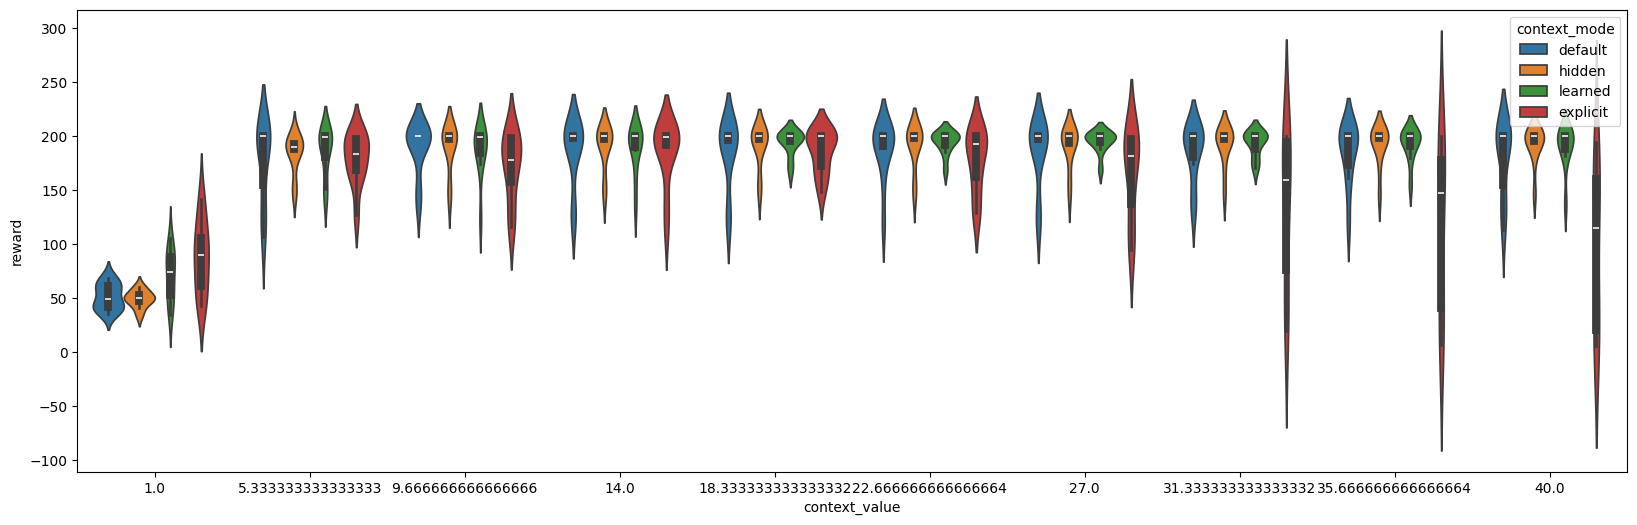

In [3]:
# Env: CARLCartpoleContinuous, context: force_mag, total_timesteps: 30000
# train_env : lower_bound_coeff: 0.2, upper_bound_coeff: 2.0, distribution: uniform (100 samples)
# test_env : lower_bound_coeff: 0.1, upper_bound_coeff: 4.0, distribution: discrete (10 samples) 
plot_rewards("results/hydra/multirun/2024-02-05/00-24-42")



## Discrete train and eval sets

/tmp/ipykernel_863751/1576777972.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


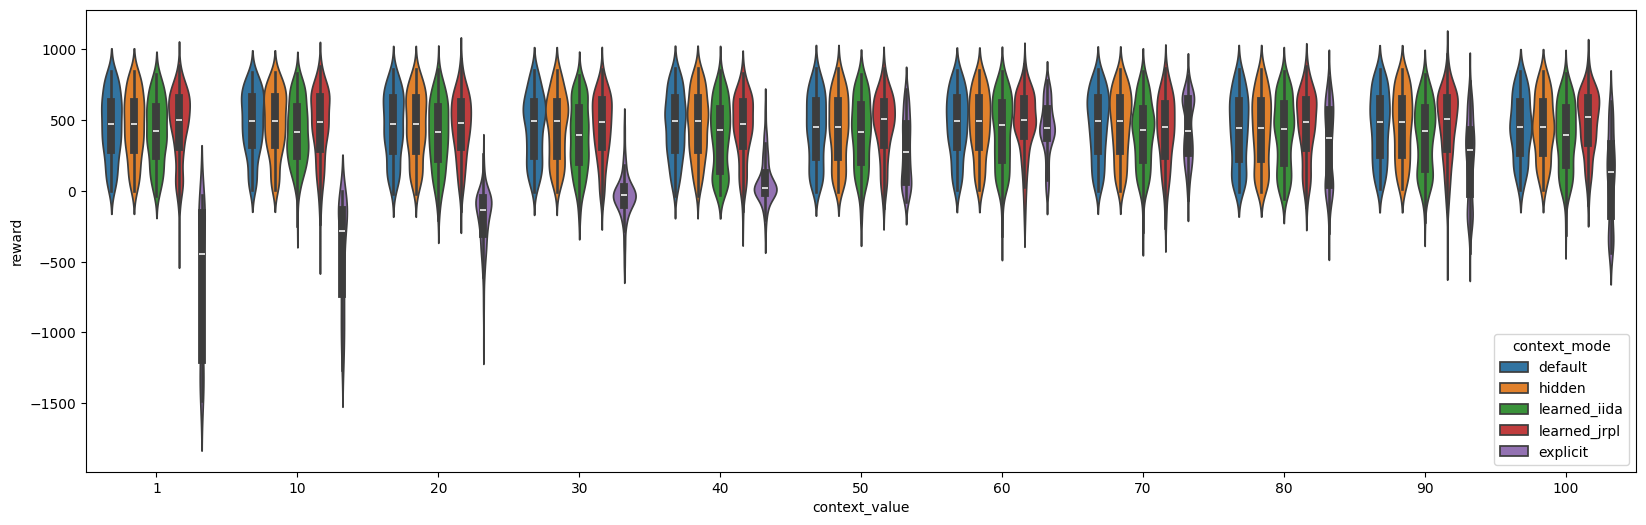

In [8]:
# Env: CARLBraxAnt, context: mass_torso, total_timesteps: 30000
# train_env : [25, 35, 45, 55, 65, 75]
# test_env : [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 
plot_rewards("results/hydra/multirun/2024-02-07/20-31-42")

/tmp/ipykernel_1225367/1576777972.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


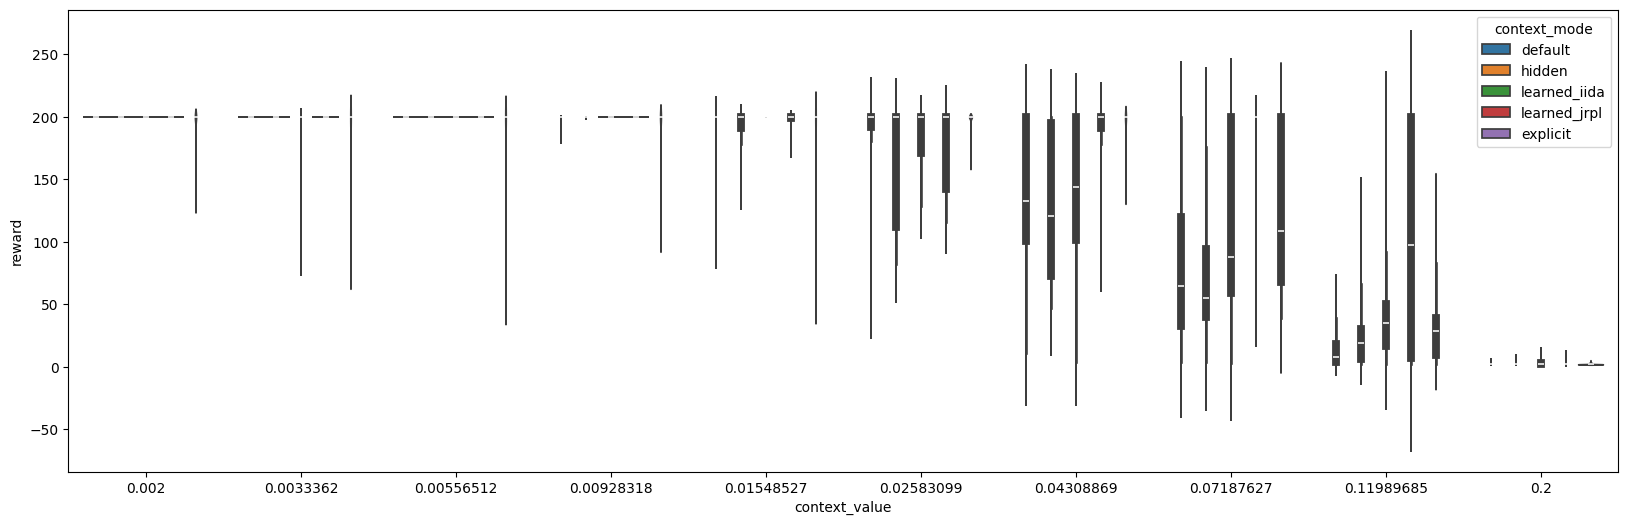

In [2]:
# Env: CARLCartpoleContinuous, context: tau, total_timesteps: 30000
# train_env : 5 mean points between the 6 middle test values [0.00742415, 0.01238423, 0.02065813, 0.03445984, 0.05748248]
# test_env : 10 values between 0.002 and 0.2 (logscale) [0.002     , 0.0033362 , 0.00556512, 0.00928318, 0.01548527, 0.02583099, 0.04308869, 0.07187627, 0.11989685, 0.2       ]
plot_rewards("results/hydra/multirun/2024-02-08/13-15-57")

/tmp/ipykernel_2493645/1576777972.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reward_df = reward_df._append({"context_mode": context_mode, "seed": seed, "context_value": context_value, "reward": reward}, ignore_index=True)


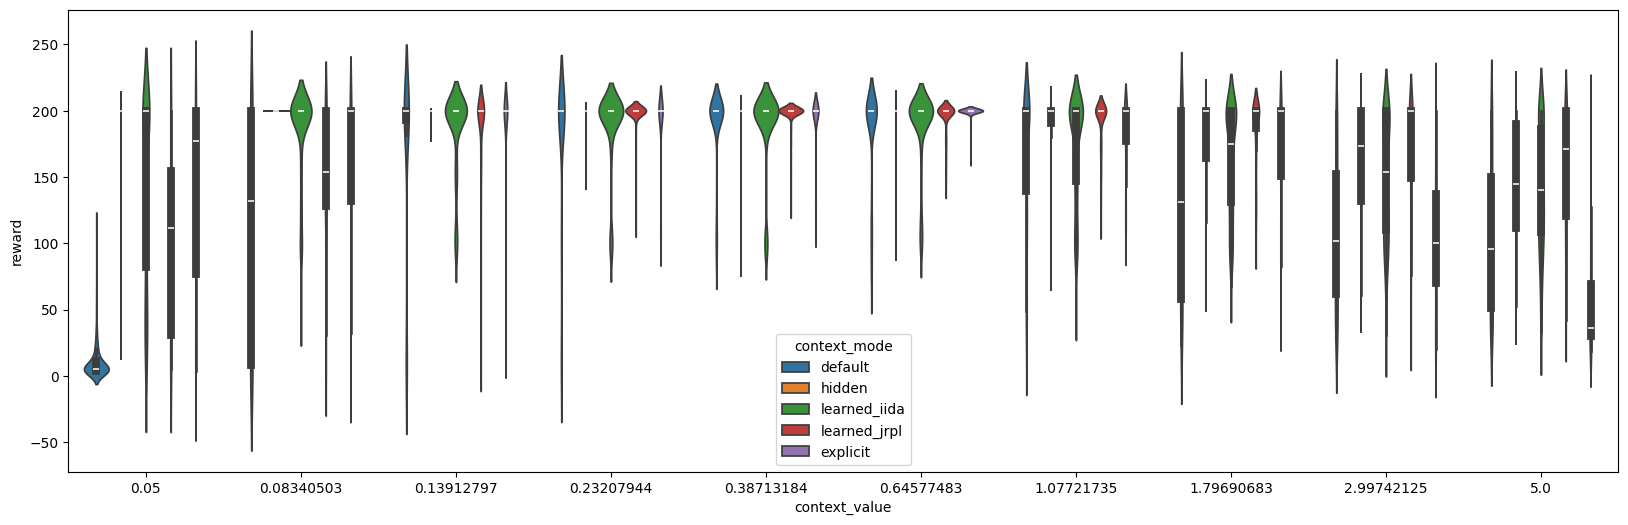

In [2]:
# Env: CARLCartpoleContinuous, context: length, total_timesteps: 30000
# train_env : [0.18560371, 0.30960564, 0.51645334, 0.86149609, 1.43706209]
# test_env : [0.05      , 0.08340503, 0.13912797, 0.23207944, 0.38713184, 0.64577483, 1.07721735, 1.79690683, 2.99742125, 5.        ]
 
plot_rewards("results/hydra/multirun/2024-02-08/18-37-18")

In [ ]:
# Env: CARLCartpoleContinuous, context: force_mag, total_timesteps: 30000
# train_env : [25, 35, 45, 55, 65, 75]
# test_env : [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plot_rewards("")

In [ ]:
# Env: CARLPendulum, context: l, total_timesteps: 30000
# train_env : [0.07320794, 0.15772173, 0.33980118, 0.73207944, 1.57721735]
# test_env : [ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,   0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ]
plot_rewards("")

In [ ]:
# Env: CARLMountainCarContinuous, context: power, total_timesteps: 30000
# train_env : [-5, -3, -1, 1, 3, 5]
# test_env :  [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
plot_rewards("")